In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV into a DataFrame
price_uk = pd.read_csv("housing_in_london_monthly_variables.csv")

# Display the first few rows of the DataFrame
print(price_uk.head())

ModuleNotFoundError: No module named 'google.colab'

In [5]:
price_uk = pd.read_csv("housing_in_london_monthly_variables.csv")

In [9]:
price_uk.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [8]:
price_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


In [6]:
print(price_uk.head())

         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  


In [10]:
print("\nDescriptive statistics for numerical variables:")
print(price_uk.describe())


Descriptive statistics for numerical variables:
                                date  average_price    houses_sold  \
count                          13549   1.354900e+04   13455.000000   
mean   2007-06-30 22:12:58.507638784   2.635197e+05    3893.994129   
min              1995-01-01 00:00:00   4.072200e+04       2.000000   
25%              2001-04-01 00:00:00   1.323800e+05     247.000000   
50%              2007-07-01 00:00:00   2.229190e+05     371.000000   
75%              2013-10-01 00:00:00   3.368430e+05    3146.000000   
max              2020-01-01 00:00:00   1.463378e+06  132163.000000   
std                              NaN   1.876175e+05   12114.402476   

       no_of_crimes  borough_flag  
count   7439.000000  13549.000000  
mean    2158.352063      0.733338  
min        0.000000      0.000000  
25%     1623.000000      0.000000  
50%     2132.000000      1.000000  
75%     2582.000000      1.000000  
max     7461.000000      1.000000  
std      902.087742      0.44223

In [ ]:
# Preprocess the data

In [11]:
# Convert the date column to datetime
price_uk['date'] = pd.to_datetime(price_uk['date']) 

In [14]:
# Drop rows with missing values in relevant columns
price_uk = price_uk.dropna(subset=['average_price', 'houses_sold', 'no_of_crimes']) 

In [15]:
# Extract relevant features for clustering
features = price_uk[['average_price', 'houses_sold', 'no_of_crimes']]

In [18]:
# Standardize the features (important for clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [19]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
# Test between 2 to 10 clusters
range_n_clusters = range(2, 11)  

In [20]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [21]:
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [22]:
# Calculate silhouette score
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

IndentationError: unexpected indent (1852238444.py, line 2)

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

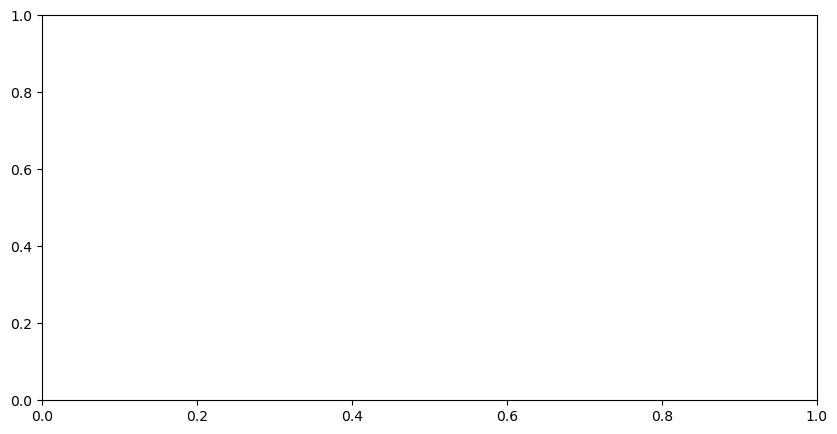

In [23]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()